# Paket Prabayar Manakah yang Lebih Baik?

Anda bekerja sebagai seorang analis di perusahaan operator telekomunikasi bernama Megaline. Perusahaan tersebut menawarkan kliennya dua jenis paket prabayar, yaitu paket Surf dan paket Ultimate. Departemen periklanan ingin mengetahui paket prabayar mana yang menghasilkan lebih banyak pendapatan, sehingga mereka bisa membuat anggaran iklan yang sesuai.

Anda akan melakukan analisis awal untuk paket-paket prabayar tersebut berdasarkan sampel klien yang berukuran relatif kecil. Anda memiliki 500 data klien Megaline, yang berisi informasi seperti: siapa mereka, dari mana asalnya, jenis paket apa yang mereka gunakan, serta jumlah panggilan dan pesan yang mereka kirim di tahun 2018. Tugas Anda adalah untuk menganalisis perilaku para pengguna, lalu menentukan paket prabayar manakah yang lebih menguntungkan.

Tujuan :
    Mencari dan mengetahui perilaku pengguna klien Megaline untuk menentukan paket prabayar (surf dan ultimate) manakah yang lebih menguntungkan? Serta mencari tahu pendapatan paling tinggi untuk di wilayah NY-NJ dengan wilayah lain.

Kerangka konsep : 
   1. Mempersiapkan Data
   2. Memperbaiki dan Memperkaya kualitas data (Plan, User, Call, Internet, SMS)
   3. Mengagregasikan data final
   4. Menganalisis data, dengan mempelajari perilaku pengguna berdasarkan pendapatan dari setiap paket
   5. Menguji Hipotesis Statistik
   6. Kesimpulan umum

## Deskripsi data

Tabel **internet** (data sesi web):
   - `id` — ID sesi web unik
   - `mb_used` — volume data yang dihabiskan selama sesi (dalam megabyte)
   - `session_date` — anggal sesi web
   - `user_id` — ID pengguna

Tabel **calls** (data panggilan):
   - `id` — ID panggilan unik
   - `call_date` — tanggal panggilan
   - `duration` — durasi panggilan (dalam menit)
   - `user_id` — ID pengguna yang melakukan panggilan

Tabel **messages** (data SMS):
   - `id` — ID SMS unik
   - `messages_date` — tanggal SMS dikirim
   - `user_id` — ID pengguna yang mengirim SMS

Tabel **plans** (data paket telepon):
   - `plan_name` — nama paket telepon
   - `usd_monthly_fee` — biaya bulanan dalam dolar AS
   - `minutes_included` — alokasi menit panggilan bulanan
   - `messages_included` — alokasi SMS bulanan
   - `mb_per_month_included` — alokasi volume data bulanan (dalam megabyte)
   - `usd_per_minute` — harga per menit jika sudah melebihi batas alokasi paket (misalnya, jika paket memiliki alokasi 100 menit maka penggunaan mulai dari menit ke-101 akan dikenakan biaya
   - `usd_per_message` — harga per SMS jika sudah melebihi batas alokasi paket
   - `usd_per_gb` — harga per gigabyte data tambahan jika sudah melebihi batas alokasi paket (1 GB = 1024 megabyte)

Tabel **users** (data pengguna):
   - `user_id` — ID pengguna
   - `first_name` — nama depan pengguna
   - `last_name` — nama belakang pengguna
   - `age` — usia pengguna (tahun)
   - `reg_date` — tanggal mulai berlangganan (dd, mm, yy)
   - `churn_date` — tanggal pengguna berhenti menggunakan layanan (jika nilainya tidak ada, berarti paket telepon sedang digunakan saat data ini dibuat)
   - `city` — kota tempat tinggal pengguna
   - `plan` — nama paket telepon

## Inisialisasi

Import dictionary

In [239]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Memuat Data

Memuat semua data yang diperlukan

In [240]:
data_internet = pd.read_csv('megaline_internet.csv') 

In [241]:
data_calls = pd.read_csv('megaline_calls.csv')

In [242]:
data_messages = pd.read_csv('megaline_messages.csv')

In [243]:
data_plans = pd.read_csv('megaline_plans.csv')

In [244]:
data_users = pd.read_csv('megaline_users.csv')

## Mempersiapkan Data

Mempersiapkan dan membersihkan data termasuk nilai hilang, tipe data yang tak sesuai, atau juga ilai duplikatnya. Sekaligus memperkaya kualitas data dengan menambahkan beberapa variabel yang lebih ringkas untuk memudahkan penganalisisan data.

## Paket Prabayar

In [245]:
data_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [246]:
data_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Berdasarkan pada tabel data_plan info kita bisa mengetahui bahwa data hanya memiliki 2 baris yang dimana ini merupakan tabel untuk setiap paket dari Surf maupun Ultimate. Untuk tipe data yang digunakan juga sudah sesuai, hanya beberapa kolom yang perlu kita ubah seperti kolom usd_monthly_pay yang akan kita ubah ke float dimana ini menunjukkan harga. Pada data yang hilang maupun duplikat juga tidak ditemukan. Perbaikan yang perlu dilakukan hanya memperkaya kualitas datanya seperti pada kolom mb_per_month_included yang akan kita ubah menjadi GB (gigabyte) karena pada kolom usd_per_gb menggunakan GB.

### Memperbaiki Data

Perbaikan tipe data pada kolom usd_monthly_pay dan usd_per_gb akan di ubah menjadi tipe data float dimana ini menunjukkan harga.

In [247]:
data_plans['usd_monthly_pay'] = data_plans['usd_monthly_pay'].astype('float')

In [248]:
data_plans['usd_per_gb'] = data_plans['usd_per_gb'].astype('float')


### Memperkaya Kualitas Data

Kita perlu menambahkan variabel gb_per_month_included sebagai bentuk pembulatan daripada kolom mb_per_month_included dengan cara membagi nilainya dengan 1024 dalam GB.

In [249]:
data_plans['gb_per_month_included'] = np.ceil(data_plans['mb_per_month_included'] / 1024).astype('int')

In [250]:
data_plans.drop('mb_per_month_included', axis=1, inplace=True)

## Pengguna

In [251]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [252]:
data_users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
270,1270,Anjelica,Chan,70,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-09-18,ultimate,NaN
442,1442,Terrell,Caldwell,66,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-05-25,ultimate,NaN
392,1392,Gale,Mcfadden,34,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-24,surf,NaN
73,1073,Grady,Crawford,30,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-04-06,surf,NaN
63,1063,Larhonda,Hartman,60,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-05,ultimate,NaN
114,1114,Esta,Estes,55,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-21,surf,NaN
143,1143,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",2018-10-26,surf,NaN
275,1275,Elvie,Velazquez,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-29,ultimate,NaN
136,1136,Jasper,Caldwell,25,"Knoxville, TN MSA",2018-10-14,surf,NaN
282,1282,Annice,Calhoun,61,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-01,ultimate,NaN


Pada data_users memiliki sejumlah data 500 baris, dan terlihat pada kolom churn_date memiliki nilai yang hilang yang memungkinkan nilai tersebut merupakan para pengguna yang masih aktif hingga saat ini. Untuk tipe data yang digunakan pada kolom reg_date masih bertipe object yang nantinya akan kita ubah ke tipe data DateTime. Ada juga kolom first_name maupun last_name akan kita eliminasi guna meringkas tabel dan sebagai gantinya kita gunakan user_id untuk analisis. Kolom City juga terlalu spesifik sedangkan yang diperlukan hanya Wilayah kotanya, oleh karna itu kita akan perbaiki kualitas datanya yang hanya berfokus pada wilayahnya saja.

### Memperbaiki Data

Pada data pengguna tidak ditemukannya data duplikat. Selanjutnya kita perlu memperbaiki tipe data reg_date dengan tipe data datetime, agar mempermudah penganalisisan data kita singkat dengan cukup mengambil data bulannya saja.

In [253]:
data_users.duplicated().sum()

0

In [254]:
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'])

In [255]:
data_users['reg_date'] = data_users['reg_date'].dt.to_period("M")

### Memperkaya Kualitas Data

Pada kolom city kita perlu ambil wilayahnya saja dengan cara kita akan membuat kolom baru dengan nama clean_city yang kemudian kita filter lagi dengan mengambil bagian wilayah kotanya saja yaitu NY-NJ dengan menambahkan kolom baru lagi dengan nama is_nynj. Adapun pada kolom city yang telah di filter akan kita eliminasi serta pada kolom first_name dan last_name juga kita drop karena kita cukup menggunakan kolom user_id saja.

In [256]:
data_users['clean_city'] = data_users['city'].str.split(', ').str[1]
data_users['clean_city'] = data_users['clean_city'].str.replace(' MSA', '')

In [257]:
data_users['is_nynj'] = data_users['clean_city'].str.contains('NY-NJ', regex=True)
data_users['is_nynj'] = data_users['is_nynj'].replace(True, 1).replace(False, 0)

In [258]:
data_users.drop(['city', 'first_name', 'last_name'], axis=1, inplace=True)

In [259]:
data_users.head()

,user_id,age,reg_date,plan,churn_date,clean_city,is_nynj
0,1000,45,2018-12,ultimate,NaN,GA,0
1,1001,28,2018-08,surf,NaN,WA,0
2,1002,36,2018-10,surf,NaN,NV,0
3,1003,52,2018-01,surf,NaN,OK,0
4,1004,40,2018-05,surf,NaN,WA,0


## Panggilan

In [260]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [261]:
data_calls.sample(10)

,id,user_id,call_date,duration
100611,1359_495,1359,2018-10-08,2.00
88158,1324_204,1324,2018-07-05,3.08
89530,1326_181,1326,2018-10-30,6.66
83931,1305_409,1305,2018-05-13,12.40
49633,1179_292,1179,2018-12-07,7.83
106543,1377_95,1377,2018-11-26,8.62
98212,1352_673,1352,2018-09-26,3.15
52280,1187_473,1187,2018-10-30,11.16
22375,1082_373,1082,2018-06-21,0.00
106528,1377_80,1377,2018-10-06,16.21


data_calls memiliki sejumlah 137735 baris di semua kolomnya yang mengindikasikan juga bahwa data_calls tidak memiliki nilai yang hilang. Sedangkan pada tipe datanya kita akan mengubah di bagian kolom call_date dengan datetime.

### Memperbaiki Data

Tidak ditemukannya data duplikat pada tabel data_calls.

In [262]:
data_calls.duplicated().sum()

0

Perbaiki tipe data call_date ke dalam datetime

In [263]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'])

### Memperkaya Kualitas Data

Menambahkan kolom year_month berdasarkan kolom call_date guna untuk mempersiapkan data agregasi dengan tabel lain.

In [264]:
data_calls['year_month'] = data_calls['call_date'].dt.to_period("M")

In [265]:
data_calls.head()

,id,user_id,call_date,duration,year_month
0,1000_93,1000,2018-12-27,8.52,2018-12
1,1000_145,1000,2018-12-27,13.66,2018-12
2,1000_247,1000,2018-12-27,14.48,2018-12
3,1000_309,1000,2018-12-28,5.76,2018-12
4,1000_380,1000,2018-12-30,4.22,2018-12


## Pesan/SMS

In [266]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [267]:
data_messages.sample(10)

,id,user_id,message_date
34726,1220_245,1220,2018-07-12
3357,1036_192,1036,2018-10-26
68549,1444_32,1444,2018-10-31
50911,1331_86,1331,2018-08-31
40940,1263_5,1263,2018-06-17
40243,1259_311,1259,2018-08-11
48258,1324_990,1324,2018-12-26
36809,1246_113,1246,2018-03-05
71865,1467_197,1467,2018-08-18
490,1004_175,1004,2018-10-04


Tabel data_messages memiliki 76051 baris data dengan tidak adanya nilai yang hilang di setiap kolomnya. messages_date memiliki tipe data yang salah, kita akan ubah menjadi tipe data datetime. Setelah itu kita akan membuat kolom baru year_month berdasarkan kolom messages_date.

### Memperbaiki Data

Tidak ditemukannya data duplikat

In [268]:
data_messages.duplicated().sum()

0

Mengubah tipe data messages_date menjadi datetime

In [269]:
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'])

### Memperkaya Kualitas Data

Menambahkan kolom year_month berdasarkan kolom message_date guna untuk mempersiapkan data agregasi dengan tabel lain.

In [270]:
data_messages['year_month'] = data_messages['message_date'].dt.to_period("M")

In [271]:
data_messages.head()

,id,user_id,message_date,year_month
0,1000_125,1000,2018-12-27,2018-12
1,1000_160,1000,2018-12-31,2018-12
2,1000_223,1000,2018-12-31,2018-12
3,1000_251,1000,2018-12-27,2018-12
4,1000_255,1000,2018-12-26,2018-12


## Internet

In [272]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [273]:
data_internet.sample(10)

,id,user_id,session_date,mb_used
15850,1072_90,1072,2018-08-19,305.51
4535,1028_88,1028,2018-12-29,639.02
53986,1245_19,1245,2018-12-26,669.94
64286,1295_150,1295,2018-08-24,1073.42
81781,1383_352,1383,2018-12-23,700.27
29579,1136_11,1136,2018-12-03,430.58
25892,1120_484,1120,2018-12-30,695.95
3826,1022_237,1022,2018-12-09,184.87
91414,1421_35,1421,2018-11-12,0.00
44339,1196_347,1196,2018-06-05,558.18


Pada tabel data_internet memiliki 104825 baris data. Setiap kolomnya juga tidak memiliki nilai yang hilang. Kita akan memperbaiki tipe data pada kolom session_date.

### Memperbaiki Data

nilai data duplikasi 0 yang berarti tidak ditemukan data duplikat.

In [274]:
data_internet.duplicated().sum()

0

merubah tipe data pada kolom session_date ke datetime

In [275]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'])

### Memperkaya Kualitas Data

Menambahkan kolom year_month berdasarkan kolom session_date guna untuk mempersiapkan data agregasi dengan tabel lain.

In [276]:
data_internet['year_month'] = data_internet['session_date'].dt.to_period("M")

In [277]:
data_internet.head()

,id,user_id,session_date,mb_used,year_month
0,1000_13,1000,2018-12-29,89.86,2018-12
1,1000_204,1000,2018-12-31,0.00,2018-12
2,1000_379,1000,2018-12-28,660.40,2018-12
3,1000_413,1000,2018-12-26,270.99,2018-12
4,1000_442,1000,2018-12-27,880.22,2018-12


## Mempelajari Syarat dan Kondisi Terkait Paket Prabayar

Setelah memperbaiki data kita akan mengagregasikannya ke satu tabel, akan tetapi sebelum itu kita perlu membuat tabel utama dari tabel data_plan dengan data_users. Tabel tersebut merupakan acuan pengguna setiap user_id terhadap paket yang digunakannya. Dengan tabel ini pula kita akan mencari tahu perilaku pengguna dalam setiap penggunaan calls, sms maupun internet yang digunakan apakah melebihi paket yang digunakan atau tidak. Dan apabila melebihi kita akan kenakan biaya extra per calls, sms maupun internet per pemakaiannya.

In [278]:
table_users = data_users.merge(data_plans, how='left', left_on='plan', right_on='plan_name').drop('plan_name', axis=1)
table_users.head()

,user_id,age,reg_date,plan,churn_date,clean_city,is_nynj,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,45,2018-12,ultimate,NaN,GA,0,1000,3000,70.0,7.0,0.01,0.01,30
1,1001,28,2018-08,surf,NaN,WA,0,50,500,20.0,10.0,0.03,0.03,15
2,1002,36,2018-10,surf,NaN,NV,0,50,500,20.0,10.0,0.03,0.03,15
3,1003,52,2018-01,surf,NaN,OK,0,50,500,20.0,10.0,0.03,0.03,15
4,1004,40,2018-05,surf,NaN,WA,0,50,500,20.0,10.0,0.03,0.03,15


## Mengagregasi Data per Pengguna


Kita buat variabel baru call_agg dimana kita perlu user_id, year_month dan duration yang sebagai patokan yang nanti akan berguna untuk di agregasikan dengan tabel yang lain. Dengan bantuan pivot table untuk mengambil kolom yang dibutuhkan yang sekaligus kita juga bisa menjumlahkan durationnya untuk setiap pengguna.

Mengingat data pada kolom duration memiliki nilai float maka kita juga akan membulatkan nilainya ke atas dengan dictionary numphy ceiling.

In [279]:
call_agg = pd.pivot_table(data_calls, index=['user_id', 'year_month'], values='duration', aggfunc='sum').reset_index()
call_agg['duration'] = np.ceil(call_agg['duration']).astype('int')
call_agg.head()

,user_id,year_month,duration
0,1000,2018-12,117
1,1001,2018-08,172
2,1001,2018-09,298
3,1001,2018-10,375
4,1001,2018-11,405


Selanjutnya untuk internet_agg dimana kita perlu user_id, year_month dan mb_used yang sebagai patokan yang nanti akan berguna untuk di agregasikan dengan tabel yang lain. Dengan bantuan pivot table untuk mengambil kolom yang dibutuhkan yang sekaligus kita juga bisa menjumlahkan mb_usednya untuk setiap pengguna.

Karena data mb_used masih dalam bentuk megabyte, kita akan mengubahnya sekaligus membuat kolom baru dengan nama gb_used yang diperoleh dari jumlah kolom mb_used yang di bagi dengan 1024 sehingga nilainya menjadi gigabyte.

In [280]:
internet_agg = pd.pivot_table(data_internet, index=['user_id', 'year_month'], values='mb_used', aggfunc='sum').reset_index()
internet_agg['gb_used'] = np.ceil(internet_agg['mb_used'] / 1024).astype('int')
internet_agg.head()

,user_id,year_month,mb_used,gb_used
0,1000,2018-12,1901.47,2
1,1001,2018-08,6919.15,7
2,1001,2018-09,13314.82,14
3,1001,2018-10,22330.49,22
4,1001,2018-11,18504.30,19


Lagi untuk message_agg dimana kita perlu user_id, year_month dan id yang sebagai patokan untuk di agregasikan dengan tabel yang lain. Dengan bantuan pivot table untuk mengambil kolom yang dibutuhkan yang sekaligus kita juga bisa menghitung banyaknya id untuk setiap pengguna sebagai jumlah dari sms yang digunakan.

Kita juga merubah nama kolomnya dari id menjadi sms.

In [281]:
message_agg = pd.pivot_table(data_messages, index=['user_id', 'year_month'], values='id', aggfunc='count').reset_index()
message_agg.columns = ['user_id', 'year_month', 'sms']
message_agg.head()

,user_id,year_month,sms
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36


----------------------- Agregasi -----------------------------

Setelah membuat dataset dari variabel calls, sms, dan internet kita bisa manggabungkan semuanya kedalam satu tabel untuk keseluruhan data yang diperlukan untuk analisis. Disini kita gabungkan call_agg ke dalam internet_agg kemudian ke dalam message_agg dan yang terakhir kita gabungkan kedalam table_users yang dimana merupakan jenis paket setiap pengguna yang digunakan.

In [282]:
main = call_agg.merge(internet_agg, how='outer', on=['user_id', 'year_month'])
main = main.merge(message_agg, how='outer', on=['user_id', 'year_month'])
df = main.merge(table_users, how='left', on='user_id')
df.tail()

,user_id,year_month,duration,mb_used,gb_used,sms,age,reg_date,plan,churn_date,clean_city,is_nynj,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
2288,1349,2018-10,NaN,13093.55,13.0,76.0,69,2018-10,surf,NaN,MA-NH,0,50,500,20.0,10.0,0.03,0.03,15
2289,1349,2018-11,NaN,17128.26,17.0,72.0,69,2018-10,surf,NaN,MA-NH,0,50,500,20.0,10.0,0.03,0.03,15
2290,1349,2018-12,NaN,13039.91,13.0,61.0,69,2018-10,surf,NaN,MA-NH,0,50,500,20.0,10.0,0.03,0.03,15
2291,1361,2018-05,NaN,1519.69,2.0,2.0,45,2018-04,surf,NaN,AL,0,50,500,20.0,10.0,0.03,0.03,15
2292,1482,2018-10,NaN,NaN,NaN,2.0,70,2018-01,ultimate,NaN,NY-NJ-PA,1,1000,3000,70.0,7.0,0.01,0.01,30


Kita cleansing dulu beberapa data yang masih mendapati masalah di beberapa kolom, seperti kita hapus kolom yang tidak perlu untuk analisis.

In [283]:
df.drop(['mb_used', 'reg_date', 'churn_date'], axis=1, inplace=True)
df.head()

,user_id,year_month,duration,gb_used,sms,age,plan,clean_city,is_nynj,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,2018-12,117.0,2.0,11.0,45,ultimate,GA,0,1000,3000,70.0,7.0,0.01,0.01,30
1,1001,2018-08,172.0,7.0,30.0,28,surf,WA,0,50,500,20.0,10.0,0.03,0.03,15
2,1001,2018-09,298.0,14.0,44.0,28,surf,WA,0,50,500,20.0,10.0,0.03,0.03,15
3,1001,2018-10,375.0,22.0,53.0,28,surf,WA,0,50,500,20.0,10.0,0.03,0.03,15
4,1001,2018-11,405.0,19.0,36.0,28,surf,WA,0,50,500,20.0,10.0,0.03,0.03,15


Mencari dan mengisi nilai yang hilang, disini pada kolom sms dan duration kita isi dengan mediannya. Sedangkan pada kolom gb_used cukup kita isi dengan nilai 0 karena hanya sedikit yang hilang datanya.

In [284]:
report_null = df.isnull().sum().to_frame()
report_null = report_null.rename(columns={0:'missing_values'})
report_null['% of total'] = (report_null['missing_values'] / df.shape[0]).round(2)
report_null.sort_values(by='missing_values', ascending=False)

,missing_values,% of total
sms,487,0.21
duration,35,0.02
gb_used,16,0.01
user_id,0,0.00
year_month,0,0.00
age,0,0.00
plan,0,0.00
clean_city,0,0.00
is_nynj,0,0.00
messages_included,0,0.00


In [285]:
grouped_by_plan = df.groupby('plan').agg({'sms': 'median', 'duration': 'median'})
for plans in df['plan'].unique():
    df.loc[(df['plan'] == plans) & (df['sms'].isnull()), 'sms'] = \
        grouped_by_plan.loc[grouped_by_plan.index == plans, 'sms'][0]
    df.loc[(df['plan'] == plans) & (df['duration'].isnull()), 'duration'] = \
        grouped_by_plan.loc[grouped_by_plan.index == plans, 'duration'][0]

In [286]:
df['gb_used'] = df['gb_used'].fillna(0)

In [287]:
report_null = df.isnull().sum().to_frame()
report_null = report_null.rename(columns={0:'missing_values'})
report_null['% of total'] = (report_null['missing_values'] / df.shape[0]).round(2)
report_null.sort_values(by='missing_values', ascending=False)

,missing_values,% of total
user_id,0,0.0
year_month,0,0.0
duration,0,0.0
gb_used,0,0.0
sms,0,0.0
age,0,0.0
plan,0,0.0
clean_city,0,0.0
is_nynj,0,0.0
messages_included,0,0.0


Setelah kita cleansing semua datanya maka kita akan memperkaya kualitas datanya yang juga kita cari tahu pendapatan yang bisa kita dapat dari setiap paket yang digunakan oleh setiap pengguna.

Pertama mencari extra_calls dimana durasi setiap penggunaan oleh pengguna melebihi batas dari paket yang di bebankan. Secara matematis extra_calls dapat diperoleh dengan cara menghitung durasi yang dikurangi dengan batas durasi paket (minutes_included) dan dikalikan biaya extra untuk per menitnya (usd_per_minute)

In [288]:
df['extra_calls'] = (df['duration'] - df['minutes_included']) * df['usd_per_minute']

In [289]:
df.loc[df['extra_calls'] < 0, 'extra_calls'] = 0

Kedua mencari extra_sms dimana jumlah sms setiap penggunaan oleh pengguna melebihi batas dari paket yang di bebankan. Secara matematis extra_sms dapat diperoleh dengan cara menghitung jumlah sms yang dikurangi dengan batas sms paket (messages_included) dan dikalikan biaya extra untuk per smsnya (usd_per_message)

In [290]:
df['extra_sms'] = (df['sms'] - df['messages_included']) * df['usd_per_message']

In [291]:
df.loc[df['extra_sms'] < 0, 'extra_sms'] = 0

Ketiga mencari extra_internet dimana gb_used setiap penggunaan oleh pengguna melebihi batas dari paket yang di bebankan. Secara matematis extra_internet dapat diperoleh dengan cara menghitung gb_used yang dikurangi dengan batas internet paket (gb_per_month_included) dan dikalikan biaya extra untuk per gigabytenya (usd_per_gb)

In [292]:
df['extra_internet'] = (df['gb_used'] - df['gb_per_month_included']) * df['usd_per_gb']

In [293]:
df.loc[df['extra_internet'] < 0, 'extra_internet'] = 0

Setelah semua sudah dihitung maka kita bisa mendapatkan nilai untuk pendapatan. Nilai tersebut dihitung berdasarkan biaya bulanan (usd_monthly_pay), ditambah extra_calls, ditambah lagi extra_internet, dan ditambahkan lagi dengan extra_sms.

In [294]:
df['total_income'] = df['usd_monthly_pay'] + df['extra_calls'] + df['extra_internet'] + df['extra_sms']

In [295]:
df.tail()

,user_id,year_month,duration,gb_used,sms,age,plan,clean_city,is_nynj,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,extra_calls,extra_sms,extra_internet,total_income
2288,1349,2018-10,406.0,13.0,76.0,69,surf,MA-NH,0,50,500,20.0,10.0,0.03,0.03,15,0.0,0.78,0.0,20.78
2289,1349,2018-11,406.0,17.0,72.0,69,surf,MA-NH,0,50,500,20.0,10.0,0.03,0.03,15,0.0,0.66,20.0,40.66
2290,1349,2018-12,406.0,13.0,61.0,69,surf,MA-NH,0,50,500,20.0,10.0,0.03,0.03,15,0.0,0.33,0.0,20.33
2291,1361,2018-05,406.0,2.0,2.0,45,surf,AL,0,50,500,20.0,10.0,0.03,0.03,15,0.0,0.00,0.0,20.00
2292,1482,2018-10,400.0,0.0,2.0,70,ultimate,NY-NJ-PA,1,1000,3000,70.0,7.0,0.01,0.01,30,0.0,0.00,0.0,70.00


In [296]:
df.shape

(2293, 20)

## Mempelajari Perilaku Pengguna

Perilaku pengguna dapat kita ukur berdasarkan data yang kita miliki yang dihitung secara statistik. Mengingat data telah kita agregasikan dan gabungkan dengan semua variabel yang diperlukan, maka alangkah lebih baik kita mempelajari perilaku pengguna secara visual dengan diagram maupun grafik.

### Panggilan

Kita bikin variabel avg_duration_monthly untuk menunjukkan rata-rata penggunaan panggilan setiap bulan berdasarkan paket yang digunakan. Setelah itu kita bikin variabel id_plan untuk menunjukkan jumlah panggilan yang dibutuhkan setiap pengguna dan setiap bulannya berdasarkan paket yang digunakan.

In [297]:
avg_duration_monthly = pd.pivot_table(df, index='year_month', columns='plan', values='duration', aggfunc='mean').reset_index()
avg_duration_monthly['year_month'] = avg_duration_monthly['year_month'].astype(str)
avg_duration_monthly

plan,year_month,surf,ultimate
0,2018-01,193.000000,183.750000
1,2018-02,281.333333,437.571429
2,2018-03,311.434783,286.166667
3,2018-04,332.920000,317.095238
4,2018-05,388.077922,384.206897
5,2018-06,411.876289,367.382979
6,2018-07,428.355372,404.271186
7,2018-08,395.179012,397.788732
8,2018-09,397.731959,413.779070
9,2018-10,414.767932,429.471698


Pada visualisasi diagram batang untuk rata-rata durasi panggilan per bulan menunjukkan untuk paket surf memiliki pendapatan paling tinggi di awal bulan hingga bulan ke 7, yang selanjutnya disusul oleh paket ultimate di bulan 8 hingga 11. Akan tetapi dari awal bulan hingga akhir bulan baik paket surf maupun ultimate mengalami pertumbuhan yang selalu meningkat di setiap bulannya.

<AxesSubplot:title={'center':'Rata-rata Durasi Panggilan per Bulan'}, xlabel='year_month'>

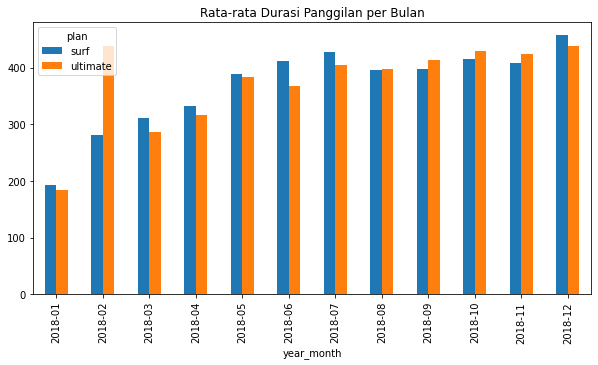

In [298]:
avg_duration_monthly.plot(x='year_month', kind='bar', title='Rata-rata Durasi Panggilan per Bulan', figsize=(10,5))

In [299]:
temp_id_plan = df[['user_id', 'year_month', 'duration']].groupby(['user_id', 'year_month']).sum().reset_index()
temp_id_plan2 = df[['user_id', 'plan']].drop_duplicates()

In [300]:
id_plan = temp_id_plan.merge(temp_id_plan2, on='user_id', how='inner')[['year_month', 'plan', 'duration']]
id_plan

,year_month,plan,duration
0,2018-12,ultimate,117.0
1,2018-08,surf,172.0
2,2018-09,surf,298.0
3,2018-10,surf,375.0
4,2018-11,surf,405.0
...,...,...,...
2288,2018-12,surf,325.0
2289,2018-09,surf,331.0
2290,2018-10,surf,364.0
2291,2018-11,surf,289.0


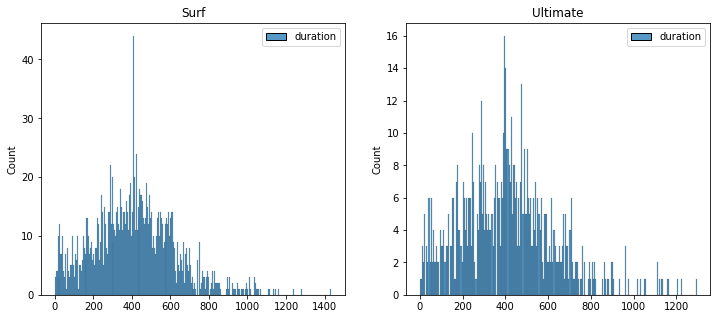

In [301]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Surf')
sns.histplot(id_plan.query('plan == "surf"'), binwidth=5)

plt.subplot(1, 2, 2)
plt.title('Ultimate')
sns.histplot(id_plan.query('plan == "ultimate"'), binwidth=5)
plt.show()

Pada grafik histogram menunjukkan penggunaan panggilan paling banyak pada paket surf, dapat dilihat dari kepadatan dan frekuensi yang ditampilkan. Baik dari paket surf dan ultimate rata-rata penggunaan durasinya paling banyak di rentang 200 - 600 menit. Persebaran data baik di paket surf dan ultimate bisa dikatakan sama.

Secara statistik kita juga akan melihat rata-rata, varians, dan standar deviasinya guna mengetahui persebaran datanya.

In [302]:
duration_month = df[['year_month', 'duration']].groupby('year_month').mean()
duration_month

,duration
year_month,
2018-01,186.833333
2018-02,349.687500
2018-03,302.771429
2018-04,328.239437
2018-05,387.018868
2018-06,397.354167
2018-07,420.461111
2018-08,395.974249
2018-09,402.660714


In [303]:
duration_var = np.var(duration_month)
duration_var

duration    4702.558429
dtype: float64

varians untuk durasi adalah 4702.5

In [304]:
np.sqrt(duration_var)

duration    68.575203
dtype: float64

standar deviasinya adalah 68.5

In [305]:
duration_per_month = pd.pivot_table(df, index='user_id', columns='year_month', values='duration', aggfunc='mean')

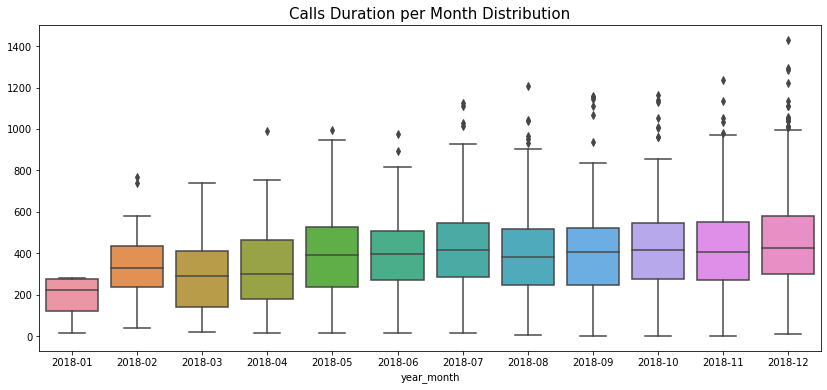

In [306]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=duration_per_month)
plt.title('Calls Duration per Month Distribution', fontsize=15)
plt.show()

Sama halnya dengan penggunaan panggilan di setiap paketnya, pada grafik boxplot durasi secara keseluruhan per bulannya menunjukkan peningkatan dari bulan pertama hingga di akhir bulan. Terlihat penggunaan panggilan paling tinggi terdapat pada bulan 12, dan yang terendah terdapat pada bulan 1.

Dapat disimpulkan bahwa penggunaan panggilan di setiap bulannya selalu mengalami kenaikan baik itu paket surf maupun ultimate, yang dimana peningkatan paling tinggi terdapat pada bulan 12, dan penggunaan paling rendah pada bulan 1. Perilaku pengguna juga sama di paket surf dan ultimate dengan rata-rata menggunakan panggilan paling banyak di rentang 200-600 menit, akan tetapi mengingat pada pengguna paket surf lebih banyak dari ultimate tidak menutup kemungkinan pengguna lebih memilih paket yang lebih murah yaitu surf meskipun ada beberapa pengguna yang masih di bebankan dengan biaya extra.

### Pesan/SMS

Kita bikin variabel avg_sms_monthly untuk menunjukkan rata-rata pemakaian sms setiap bulan berdasarkan paket yang digunakan. Setelah itu kita bikin variabel sms_plan untuk menunjukkan jumlah sms yang dibutuhkan setiap pengguna dan setiap bulannya berdasarkan paket yang digunakan.

In [307]:
avg_sms_monthly = pd.pivot_table(df, index='year_month', columns='plan', values='sms', aggfunc='mean').reset_index()
avg_sms_monthly['year_month'] = avg_sms_monthly['year_month'].astype(str)
avg_sms_monthly

plan,year_month,surf,ultimate
0,2018-01,26.500000,25.750000
1,2018-02,26.222222,27.428571
2,2018-03,25.000000,37.333333
3,2018-04,26.360000,31.809524
4,2018-05,32.740260,43.413793
5,2018-06,33.216495,37.191489
6,2018-07,34.966942,41.169492
7,2018-08,36.283951,46.563380
8,2018-09,37.855670,45.046512
9,2018-10,40.320675,46.018868


<AxesSubplot:title={'center':'Rata-rata SMS per bulan'}, xlabel='year_month'>

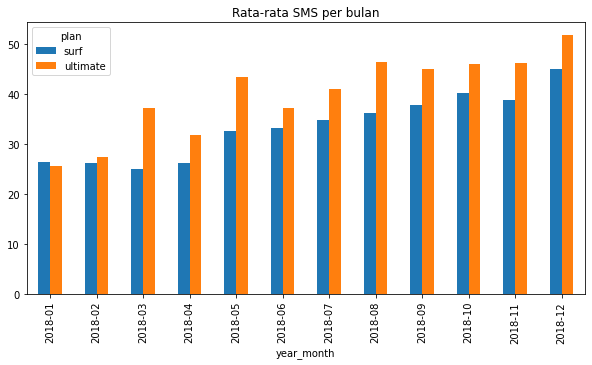

In [308]:
avg_sms_monthly.plot(x='year_month', kind='bar', title='Rata-rata SMS per bulan', figsize=(10,5))

Terlihat bahwa pada diagram batang untuk rata-rata sms per bulannya untuk setiap paket mengalami kenaikan. Akan tetapi pertumbuhannya pada paket ultimate mengalami naik turun, sedangkan paket surf mengalami stagnansi pada bulan 1 hingga bulan ke 4.

In [309]:
temp_sms_plan = df[['user_id', 'year_month', 'sms']].groupby(['user_id', 'year_month']).sum().reset_index()
temp_sms_plan2 = df[['user_id', 'plan']].drop_duplicates()

In [310]:
sms_plan = temp_sms_plan.merge(temp_sms_plan2, on='user_id', how='inner')[['year_month', 'plan', 'sms']]
sms_plan

,year_month,plan,sms
0,2018-12,ultimate,11.0
1,2018-08,surf,30.0
2,2018-09,surf,44.0
3,2018-10,surf,53.0
4,2018-11,surf,36.0
...,...,...,...
2288,2018-12,surf,32.0
2289,2018-09,surf,32.0
2290,2018-10,surf,32.0
2291,2018-11,surf,32.0


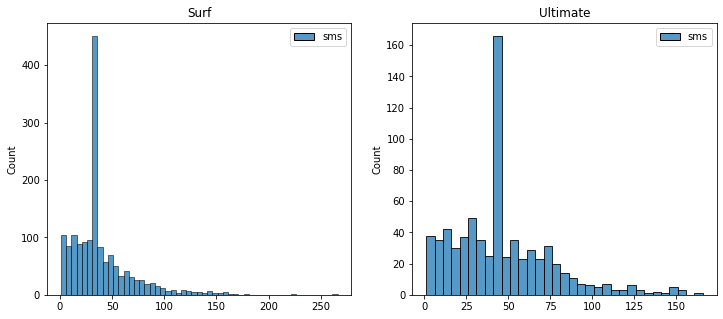

In [311]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Surf')
sns.histplot(sms_plan.query('plan == "surf"'), binwidth=5)

plt.subplot(1, 2, 2)
plt.title('Ultimate')
sns.histplot(sms_plan.query('plan == "ultimate"'), binwidth=5)
plt.show()

Pada grafik histogram menunjukkan penggunaan sms paling banyak pada paket surf, dapat dilihat dari kepadatan dan frekuensi yang ditampilkan. Baik dari paket surf dan ultimate rata-rata penggunaan durasinya paling banyak di rentang 1 - 70 sms. Persebaran data baik di paket surf dan ultimate bisa dikatakan sama.

Secara statistik kita juga akan melihat rata-rata, varians, dan standar deviasinya guna mengetahui persebaran datanya.

In [312]:
avg_sms = df[['year_month', 'sms']].groupby('year_month').mean()
avg_sms

,sms
year_month,
2018-01,26.000000
2018-02,26.750000
2018-03,29.228571
2018-04,27.971831
2018-05,35.660377
2018-06,34.513889
2018-07,37.000000
2018-08,39.416309
2018-09,40.064286


In [313]:
sms_var = np.var(avg_sms)
sms_var

sms    42.89623
dtype: float64

In [314]:
np.sqrt(sms_var)

sms    6.549521
dtype: float64

standar deviasinya yaitu 6.5

In [315]:
sms_per_month = pd.pivot_table(df, index='user_id', columns='year_month', values='sms', aggfunc='mean')

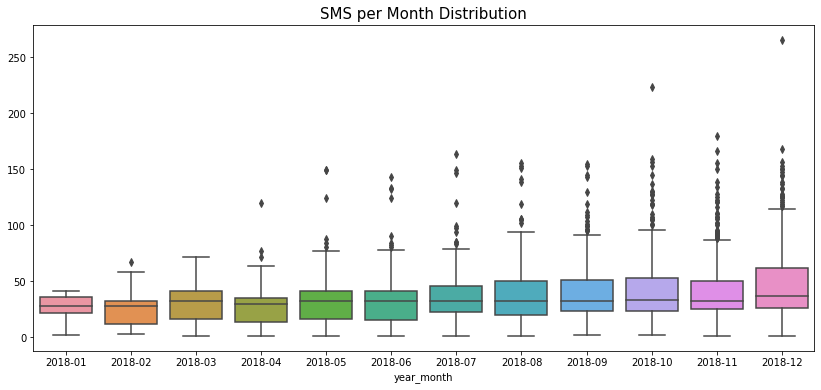

In [316]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=sms_per_month)
plt.title('SMS per Month Distribution', fontsize=15)
plt.show()

Sama halnya dengan rata-rata penggunaan sms di setiap paketnya, pada grafik boxplot penggunaan sms secara keseluruhan per bulannya menunjukkan peningkatan dari bulan pertama hingga di akhir bulan tetapi tidak terlalu signifikan. Terlihat penggunaan sms paling tinggi terdapat pada bulan 12, dan yang terendah terdapat pada bulan 1.

Dapat disimpulkan bahwa penggunaan sms di setiap bulannya selalu mengalami kenaikan baik itu paket surf maupun ultimate, yang dimana peningkatan paling tinggi terdapat pada bulan 12, dan penggunaan paling rendah pada bulan 1. Baik dari paket surf dan ultimate juga rata-rata penggunaan smsnya paling banyak di rentang 1 - 70 sms.

### Internet

Kita bikin variabel avg_gb_monthly untuk menunjukkan rata-rata penggunaan kuota internet (gigabyte) setiap bulan berdasarkan paket yang digunakan. Setelah itu kita bikin variabel gb_plan untuk menunjukkan jumlah kuota yang dibutuhkan setiap pengguna dan setiap bulannya berdasarkan paket yang digunakan.

In [317]:
avg_gb_monthly = pd.pivot_table(df, index='year_month', columns='plan', values='gb_used', aggfunc='mean').reset_index()
avg_gb_monthly['year_month'] = avg_gb_monthly['year_month'].astype(str)
avg_gb_monthly

plan,year_month,surf,ultimate
0,2018-01,5.000000,7.250000
1,2018-02,12.222222,17.285714
2,2018-03,13.565217,18.416667
3,2018-04,12.220000,16.333333
4,2018-05,14.116883,16.862069
5,2018-06,15.484536,15.425532
6,2018-07,16.876033,16.491525
7,2018-08,16.882716,17.845070
8,2018-09,16.690722,17.011628
9,2018-10,17.409283,17.716981


<AxesSubplot:xlabel='year_month'>

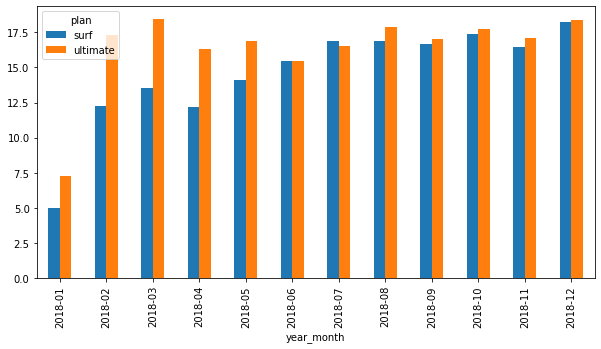

In [318]:
avg_gb_monthly.plot(x='year_month', kind='bar', figsize=(10,5))

Terlihat bahwa pada diagram batang untuk rata-rata kuota internet (gigabyte) per bulannya ntuk setiap paket mengalami kenaikan. Akan tetapi berdasarkan pertumbuhannya pada paket ultimate mengalami naik turun, sedangkan paket surf stabil naik dari awal bulan hingga akhir.

In [319]:
temp_gb_plan = df[['user_id', 'year_month', 'gb_used']].groupby(['user_id', 'year_month']).sum().reset_index()
temp_gb_plan2 = df[['user_id', 'plan']].drop_duplicates()

In [320]:
gb_plan = temp_gb_plan.merge(temp_gb_plan2, on='user_id', how='inner')[['year_month', 'plan', 'gb_used']]
gb_plan

,year_month,plan,gb_used
0,2018-12,ultimate,2.0
1,2018-08,surf,7.0
2,2018-09,surf,14.0
3,2018-10,surf,22.0
4,2018-11,surf,19.0
...,...,...,...
2288,2018-12,surf,23.0
2289,2018-09,surf,13.0
2290,2018-10,surf,20.0
2291,2018-11,surf,17.0


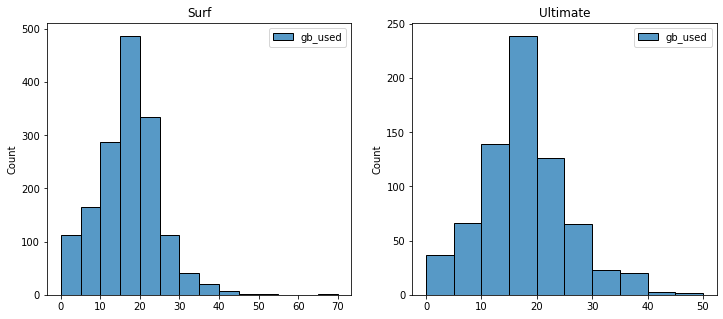

In [321]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Surf')
sns.histplot(gb_plan.query('plan == "surf"'), binwidth=5)

plt.subplot(1, 2, 2)
plt.title('Ultimate')
sns.histplot(gb_plan.query('plan == "ultimate"'), binwidth=5)
plt.show()

Pada grafik histogram menunjukkan penggunaan kuota internet (gigabyte) sedikit lebih banyak pada paket surf daripada ultimate, dapat dilihat dari kepadatan dan frekuensi yang ditampilkan. Baik dari paket surf dan ultimate rata-rata penggunaan kuotanya paling banyak di rentang 10 - 25 gigabyte. Persebaran data baik di paket surf dan ultimate bisa dikatakan sama.

Secara statistik kita juga akan melihat rata-rata, varians, dan standar deviasinya guna mengetahui persebaran datanya.

In [322]:
avg_gb = df[['year_month', 'gb_used']].groupby('year_month').mean()
avg_gb

,gb_used
year_month,
2018-01,6.500000
2018-02,14.437500
2018-03,15.228571
2018-04,13.436620
2018-05,14.867925
2018-06,15.465278
2018-07,16.750000
2018-08,17.175966
2018-09,16.789286


In [323]:
internet_var = np.var(avg_gb)
internet_var

gb_used    8.774875
dtype: float64

varians dari internet per bulannya adalah 8.7

In [324]:
np.sqrt(internet_var)

gb_used    2.962242
dtype: float64

standar deviasi internetnya adalah 2.9

In [325]:
gb_per_month = pd.pivot_table(df, index='user_id', columns='year_month', values='gb_used', aggfunc='mean')

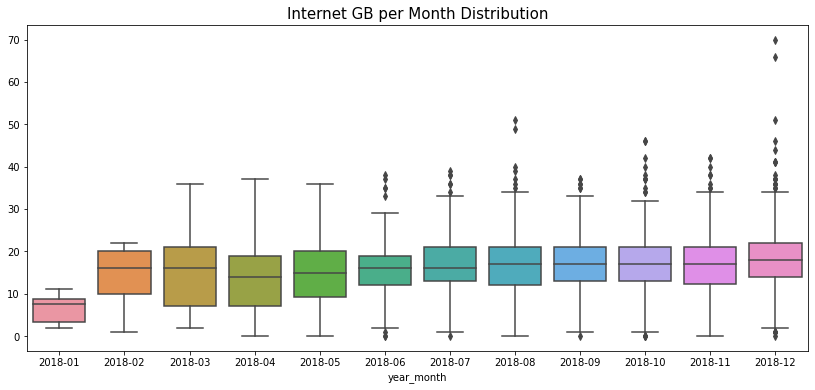

In [326]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=gb_per_month)
plt.title('Internet GB per Month Distribution', fontsize=15)
plt.show()

Pada grafik boxplot untuk penggunaan kuota internet (gigabyte) secara keseluruhan per bulannya menunjukkan peningkatan dari bulan pertama hingga bulan ke-4 saja, setelah itu pertumbuhannya cukup stabil hingga akhir bulan. Terlihat penggunaan kuota paling tinggi terdapat pada bulan 12 dengan nilai 70 GB, dan yang terendah terdapat pada bulan 1 hanya 10 GB.

Dapat disimpulkan bahwa penggunaan kuota internet (gigabyte) di setiap bulannya selalu mengalami kenaikan baik itu paket surf maupun ultimate, yang dimana peningkatan paling tinggi terdapat pada bulan 12, dan penggunaan paling rendah pada bulan 1. Perilaku pengguna juga sama di paket surf dan ultimate dengan rata-rata menggunakan kuota paling banyak di rentang 10 - 25 gigabyte, akan tetapi mengingat pada pengguna paket surf lebih banyak dari ultimate tidak menutup kemungkinan pengguna lebih memilih paket yang lebih murah yaitu surf meskipun ada beberapa pengguna yang masih di bebankan dengan biaya extra.

## Pendapatan

Sekarang pada tahap pendapatan, pertama kita bikin variabel avg_income_monthly untuk menunjukkan rata-rata pendapatan setiap bulan berdasarkan macam paket yang digunakan. Setelah itu kita bikin variabel income_plan untuk menunjukkan jumlah kuota yang dibutuhkan setiap pengguna dan setiap bulannya berdasarkan paket yang digunakan.

In [327]:
avg_income_monthly = pd.pivot_table(df, index='year_month', columns='plan', values='total_income', aggfunc='mean').reset_index()
avg_income_monthly['year_month'] = avg_income_monthly['year_month'].astype(str)
avg_income_monthly

plan,year_month,surf,ultimate
0,2018-01,20.000000,70.000000
1,2018-02,34.260000,70.000000
2,2018-03,45.792609,74.666667
3,2018-04,40.458600,73.000000
4,2018-05,47.240130,70.724138
5,2018-06,48.935155,71.638298
6,2018-07,62.226529,71.898305
7,2018-08,63.576728,72.859155
8,2018-09,57.952320,72.034884
9,2018-10,65.051097,72.311321


<AxesSubplot:title={'center':'Rata-rata income per Bulan'}, xlabel='year_month'>

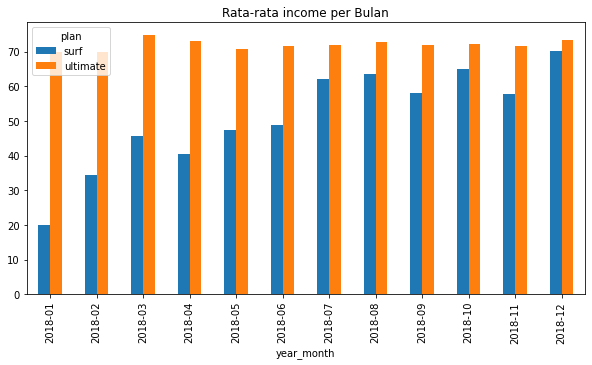

In [328]:
avg_income_monthly.plot(kind='bar', x='year_month', title='Rata-rata income per Bulan', figsize=(10,5))

Terlihat bahwa pada diagram batang untuk rata-rata pendapatan per bulannya ntuk setiap paket mengalami kenaikan. Akan tetapi berdasarkan pertumbuhannya pada paket ultimate cukup stabil bertahan di angka 70 dolar perbulannya. Sedangkan pada paket surf mengalami kenaikan yang signifikan setiap bulannya walaupun ada beberapa yang mengalami penurunan, nilai yang dimiliki paling tinggi ada pada 70 dolar pada bulan 12.

In [329]:
temp_income_plan = df[['user_id', 'year_month', 'total_income']].groupby(['user_id', 'year_month']).sum().reset_index()
temp_income_plan2 = df[['user_id', 'plan']].drop_duplicates()

In [330]:
income_plan = temp_income_plan.merge(temp_income_plan2, on='user_id', how='inner')[['year_month', 'plan', 'total_income']]
income_plan

,year_month,plan,total_income
0,2018-12,ultimate,70.00
1,2018-08,surf,20.00
2,2018-09,surf,20.00
3,2018-10,surf,90.09
4,2018-11,surf,60.00
...,...,...,...
2288,2018-12,surf,100.00
2289,2018-09,surf,20.00
2290,2018-10,surf,70.00
2291,2018-11,surf,40.00


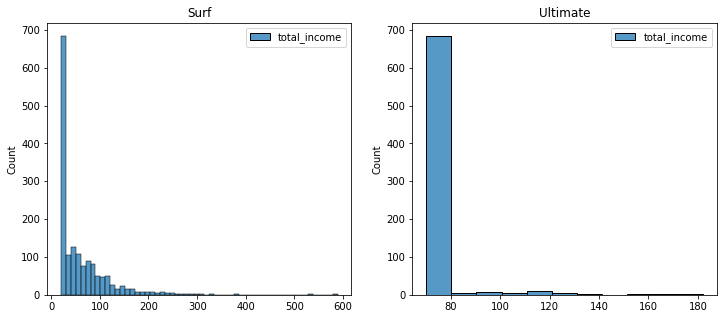

In [331]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Surf')
sns.histplot(income_plan.query('plan == "surf"'))

plt.subplot(1, 2, 2)
plt.title('Ultimate')
sns.histplot(income_plan.query('plan == "ultimate"'))
plt.show()

Pada grafik histogram menunjukkan pendapatan pada paket surf sedikit lebih banyak daripada ultimate, dapat dilihat dari kepadatan dan frekuensi yang ditampilkan. Pada paket surf pendapatan paling tinggi memiliki nilai 580 dolar dan ultimate hanya pada di angka 180 dolar. Persebaran data di paket surf cenderung berada di kisaran 25 - 100 dolar dan untuk paket ultimate berada pada 35 - 80 dolar.

Secara statistik kita juga akan melihat rata-rata, varians, dan standar deviasinya guna mengetahui persebaran datanya.

In [332]:
total_income = income_plan[['plan', 'total_income']].groupby('plan').sum()
total_income

,total_income
plan,
surf,94902.13
ultimate,52066.00


Pendapatan total paling tinggi yaitu paket dari surf dengan jumlah 94902 dolar, dan ultimate hanya di angka 52066 dolar.

In [333]:
avg_income = df[['year_month', 'total_income']].groupby('year_month').mean()
avg_income

,total_income
year_month,
2018-01,53.333333
2018-02,49.896250
2018-03,55.692286
2018-04,50.083521
2018-05,53.665000
2018-06,56.345208
2018-07,65.396722
2018-08,66.405279
2018-09,62.277679


In [334]:
income_var = np.var(avg_income)
income_var

total_income    47.490315
dtype: float64

Varians dari rata-rata pendapatannya adalah 47.5

In [335]:
np.sqrt(income_var)

total_income    6.891322
dtype: float64

Sedangkan standar deviasinya adalah 6.9

In [336]:
income_per_month = pd.pivot_table(df, index='user_id', columns='year_month', values='total_income', aggfunc='mean')

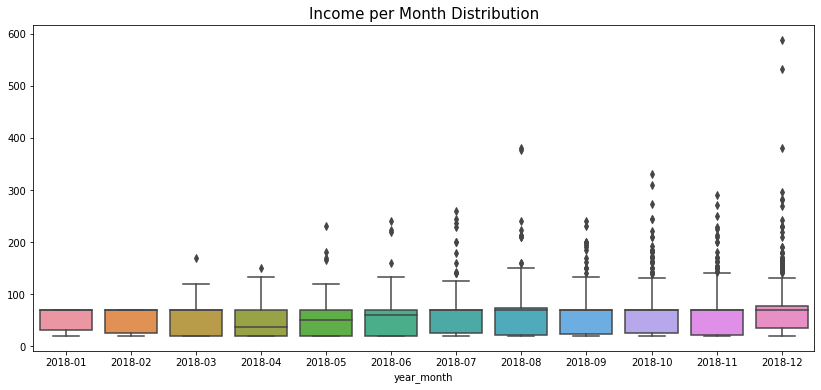

In [337]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=income_per_month)
plt.title('Income per Month Distribution', fontsize=15)
plt.show()

Pada grafik boxplot untuk pendapatan secara keseluruhan per bulannya menunjukkan peningkatan kurang signifikan cenderung stabil. Terlihat pendapatan paling tinggi terdapat pada bulan 12 di angka 580 dolar dan yang terendah terdapat pada bulan 1 & 2 hanya 35 - 80 dolar.

Dapat disimpulkan bahwa pendapatan di setiap bulannya selalu mengalami pertumbuhan dimana penadapatan paling tinggi terdapat pada bulan 12, dan pendapatan paling rendah pada bulan 1 & 2. Perilaku pengguna berdasarkan persebaran datanya sendiri pada paket surf cenderung berada di kisaran 25 - 100 dolar dan untuk paket ultimate berada pada 35 - 80 dolar. Pendapatan berdasarkan setiap pengguna untuk tiap-tiap paketnya paling tinggi terdapat pada paket surf dimana bulan ke-12 di angka 580 dolar dan untuk paket ultimate di angka 180 dolar. Akan tetapi mengingat pada pengguna paket surf lebih banyak dari ultimate tidak menutup kemungkinan pengguna lebih memilih paket yang lebih murah yaitu surf meskipun ada beberapa pengguna yang masih di bebankan dengan biaya extra.

## Menguji Hipotesis Statistik

Pengujian hipotesis statistik pertama kita akan membuat tabel untuk total_income yang di urutkan dengan user_id berdasarkan paketnya (Surf dan Ultimate). Setelah itu kita uji statistik berdasarkan pendapatan setiap paket tersebut untuk mengetahui H0 dan Ha.

Uji Statistik : Two sample t-test independent

Hipotesis :
   - H0 = Apabila rata-rata pendapatan pada paket surf dan ultimate sama
   - Ha = Apabila rata-rata pendapatan pada paket surf dan ultimate beda
   
Alpha : 5% / 0.05

In [338]:
income_avg = pd.pivot_table(df, index='user_id', columns='plan', values='total_income', aggfunc='mean').reset_index()
income_avg

plan,user_id,surf,ultimate
0,1000,NaN,70.0
1,1001,50.018000,NaN
2,1002,33.333333,NaN
3,1003,156.230000,NaN
4,1004,76.250000,NaN
...,...,...,...
485,1495,118.092500,NaN
486,1496,28.000000,NaN
487,1497,NaN,70.0
488,1498,77.272727,NaN


In [339]:
from scipy import stats as st

surf = income_avg['surf']
ultimate = income_avg['ultimate']

alpha = 0.05

results = st.ttest_ind(surf, ultimate, nan_policy='omit', alternative='less', equal_var=False)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak bisa menolak hipotesis nol")
print()
print('Rata-rata income di surf', surf.mean())
print('Rata-rata income di ultimate', ultimate.mean())

p-value:  1.2482464781451398e-08
Kita menolak hipotesis nol

Rata-rata income di surf 57.841349247515915
Rata-rata income di ultimate 71.82328379334749


Analisis statistik menunjukkan bahwa :
  - P-Value rata-rata pendapatan antara paket surf dan ultimate adalah 0,00000124%
  - Kita menolak H0, yang mengindikasikan rata-rata pendapatan paket surf dan ultimate berbeda

Hasil analisis memang menunjukkan rata-rata pendapatan pada paket surf dengan paket ultimate berbeda. Bisa jadi dikarenakan paket surf lebih murah sehingga peminatnya banyak dan tidak menutup kemungkinan bahwa pengguna pada paket surf juga menggunakan tarif extra karena melebihi limit dari paket surf itu sendiri sehingga pendapatannya juga ikut tinggi daripada paket ultimate.

Sekarang kita akan menguji hipotesis untuk pengguna di wilayah NY-NJ dengan wilayah lain. Pertama kita akan membuat tabel untuk total_income yang di urutkan dengan user_id berdasarkan pengguna di wilayah NY-NJ. Setelah itu kita uji statistik berdasarkan pendapatan setiap wilayah tersebut untuk mengetahui H0 dan Ha.

Uji Statistik : Two sample t-test independent

Hipotesis :
   - H0 = Apabila rata-rata pendapatan pada wilayah NYNJ dengan wilayah yang lain sama
   - Ha = Apabila rata-rata pendapatan pada wilayah NYNJ dengan wilayah yang lain beda
   
Alpha : 5% / 0.05

In [340]:
area_income = pd.pivot_table(df, index='user_id', columns='is_nynj', values='total_income', aggfunc='mean').reset_index()
area_income.columns = ['user_id', 'non_nynj', 'nynj']
area_income

,user_id,non_nynj,nynj
0,1000,70.000000,NaN
1,1001,50.018000,NaN
2,1002,33.333333,NaN
3,1003,156.230000,NaN
4,1004,76.250000,NaN
...,...,...,...
485,1495,NaN,118.092500
486,1496,28.000000,NaN
487,1497,70.000000,NaN
488,1498,NaN,77.272727


In [341]:
from scipy import stats as st

nynj = area_income['nynj']
non_nynj = area_income['non_nynj']

alpha = 0.05

results = st.ttest_ind(nynj, non_nynj, nan_policy='omit', equal_var=False)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak bisa menolak hipotesis nol")
print()
print('Rata-rata income di wilayah NY-NJ adalah', nynj.mean())
print('Rata-rata income di wilayah selain kota NY-NJ adalah', non_nynj.mean())

p-value:  0.4311816840939525
Kita tidak bisa menolak hipotesis nol

Rata-rata income di wilayah NY-NJ adalah 59.59239807660694
Rata-rata income di wilayah selain kota NY-NJ adalah 62.84580390979662


Analisis statistik menunjukkan bahwa :
  - P-Value rata-rata pendapatan di wilayah NY-NJ dan wilayah lain adalah 43%
  - Kita tidak bisa menolak H0, yang mengindikasikan rata-rata pendapatan di wilayah NY-NJ dan wilayah lain sama

Hasil analisis memang menunjukkan rata-rata pendapatan di wilayah NY-NJ dan wilayah lain sama, tetapi kita tidak memiliki cukup data untuk mengatakan dengan tepat bagaimana persisnya persamaan tersebut. P-Value dengan nilai 43%  menunjukkan probabilitas ini jelas terlalu tinggi untuk menyimpulkan bahwa ada perbedaan yang signifikan antara jumlah rata-rata di wilayah NY-NJ dan di wilayah lain. Bisa jadi dikarenakan perbandingan di wilayah NY-NJ dan wilayah lain terlalau besar jangkauannya, apabila kita bandingkan dengan kota spesifik tertentu lainnya kemungkinan terdapat di salah satu kota tersebut akan ada yang beda rata-rata pendapatannya dengan di wilayah NY-NJ.

## Kesimpulan Umum


Diawali dengan inisialisasi dictionary oleh pandas, matplotlib, numphy, seaborn, dan scipy.stat untuk pengolahan data kita. Kemudian kita memuat datanya yang terdiri dari data plan, user, call, messages, dan internet. 

Langkah berikutnya kita akan memperbaiki data dan memperkaya kualitas datanya untuk tiap-tiap data.
1. Plan (data_plans):
  - Memperbaiki tipe data pada kolom usd_monthly_pay dan usd_per_gb
  - Menambahkan kolom gb_per_monthly_included dengan cara membagi kolom gb_per_monthly_included dengan 1024 dan di bulatkan nilainya keatas
2. User (data_users):
  - Menambahkan kolom baru wilayah NY-NJ (is_nynj) dari kolom city, dengan mengambil datanya berdasarkan index dari kolom city yang kita persingkat hanya spesifik nama kotanya saja
  - Menghapus kolom first_name dan last_name untuk meringkas tabel, karena kita bisa menggunakan user_id sebagai gantinya
3. Call (data_calls):
  - Memperbaiki tipe data pada kolom call_date ke tipe data datetime
  - Membuat kolom baru dari call_date yang bernama year_month guna untuk mengagregasikan tabel calls dengan yang lain
4. Messages (data_messages):
  - Memperbaiki tipe data pada kolom messages_date ke tipe data datetime
  - Membuat kolom baru dari messages_date yang bernama year_month guna untuk mengagregasikan tabel meessages dengan yang lain
5. Internet (data_internet):
  - Memperbaiki tipe data pada kolom session_date ke tipe data datetime
  - Membuat kolom baru dari session_date yang bernama year_month guna untuk mengagregasikan tabel internet dengan yang lain

Setelah memperbaiki data kita akan mengagregasikannya ke satu tabel, akan tetapi sebelum itu kita perlu membuat tabel utama dari tabel data_plan dengan data_users. Tabel tersebut merupakan acuan pengguna setiap user_id terhadap paket yang digunakannya (surf atau ultimate). Dengan tabel ini pula kita akan mencari tahu perilaku pengguna dalam setiap penggunaan calls, sms maupun internet yang digunakan apakah melebihi paket yang digunakan atau tidak. Dan apabila melebihi kita akan kenakan biaya extra per calls, sms maupun internet per pemakaiannya.

Dikarenakan data terbagi dari beberapa tabel maka kita akan gabungkan menjadi satu kesatuan.
  1. Kita buat variabel baru call_agg dimana kita perlu user_id, year_month dan duration yang sebagai patokan yang nanti akan berguna untuk di agregasikan dengan tabel yang lain. Dengan bantuan pivot table untuk mengambil kolom yang dibutuhkan yang sekaligus kita juga bisa menjumlahkan durationnya untuk setiap pengguna.
  2. Selanjutnya untuk internet_agg dimana kita perlu user_id, year_month dan mb_used yang sebagai patokan yang nanti akan berguna untuk di agregasikan dengan tabel yang lain. Dengan bantuan pivot table untuk mengambil kolom yang dibutuhkan yang sekaligus kita juga bisa menjumlahkan mb_usednya untuk setiap pengguna.
  3. Lagi untuk message_agg dimana kita perlu user_id, year_month dan id yang sebagai patokan untuk di agregasikan dengan tabel yang lain. Dengan bantuan pivot table untuk mengambil kolom yang dibutuhkan yang sekaligus kita juga bisa menghitung banyaknya id untuk setiap pengguna sebagai jumlah dari sms yang digunakan. Karena data mb_used masih dalam bentuk megabyte, kita akan mengubahnya sekaligus membuat kolom baru dengan nama gb_used yang diperoleh dari jumlah kolom mb_used yang di bagi dengan 1024 sehingga nilainya menjadi gigabyte.
  4. Disini kita gabungkan call_agg ke dalam internet_agg kemudian ke dalam message_agg dan yang terakhir kita gabungkan kedalam table_users yang dimana merupakan jenis paket setiap pengguna yang digunakan.
  5. Dataframe dari keseluruhan tabel pun sudah di buat dengan nama df.

Setelah menggabungkan semua tabel menjadi satu, kita bisa mencari pendapatan yang diperoleh lalu kita simpan dalam satu variabel.
  1. Mencari extra_calls dimana durasi setiap penggunaan oleh pengguna melebihi batas dari paket yang di bebankan. Secara matematis extra_calls dapat diperoleh dengan cara menghitung durasi yang dikurangi dengan batas durasi paket (minutes_included) dan dikalikan biaya extra untuk per menitnya (usd_per_minute)
  2. Mencari extra_sms dimana jumlah sms setiap penggunaan oleh pengguna melebihi batas dari paket yang di bebankan. Secara matematis extra_sms dapat diperoleh dengan cara menghitung jumlah sms yang dikurangi dengan batas sms paket (messages_included) dan dikalikan biaya extra untuk per smsnya (usd_per_message)
  3. Mencari extra_internet dimana gb_used setiap penggunaan oleh pengguna melebihi batas dari paket yang di bebankan. Secara matematis extra_internet dapat diperoleh dengan cara menghitung gb_used yang dikurangi dengan batas internet paket (gb_per_month_included) dan dikalikan biaya extra untuk per gigabytenya (usd_per_gb)
  4. Setelah semua sudah dihitung maka kita bisa mendapatkan nilai untuk pendapatan. Nilai tersebut dihitung berdasarkan biaya bulanan (usd_monthly_pay), ditambah extra_calls, ditambah lagi extra_internet, dan ditambahkan lagi dengan extra_sms.
  5. Pendapatan disimpan dalam kolom total_income
  
Perilaku pengguna dapat kita ukur berdasarkan data yang kita miliki yang dihitung secara statistik. Mengingat data telah kita agregasikan dan gabungkan dengan semua variabel yang diperlukan, maka alangkah lebih baik kita mempelajari perilaku pengguna secara visual dengan diagram maupun grafik.
  1. Call: Dapat disimpulkan bahwa penggunaan panggilan di setiap bulannya selalu mengalami kenaikan baik itu paket surf maupun ultimate, yang dimana peningkatan paling tinggi terdapat pada bulan 12, dan penggunaan paling rendah pada bulan 1. Perilaku pengguna juga sama di paket surf dan ultimate dengan rata-rata menggunakan panggilan paling banyak di rentang 200-600 menit, akan tetapi mengingat pada pengguna paket surf lebih banyak dari ultimate tidak menutup kemungkinan pengguna lebih memilih paket yang lebih murah yaitu surf meskipun ada beberapa pengguna yang masih di bebankan dengan biaya extra.
  2. Messages: Dapat disimpulkan bahwa penggunaan sms di setiap bulannya selalu mengalami kenaikan baik itu paket surf maupun ultimate, yang dimana peningkatan paling tinggi terdapat pada bulan 12, dan penggunaan paling rendah pada bulan 1. Baik dari paket surf dan ultimate juga rata-rata penggunaan smsnya paling banyak di rentang 1 - 70 sms.
  3. Internet: Dapat disimpulkan bahwa penggunaan kuota internet (gigabyte) di setiap bulannya selalu mengalami kenaikan baik itu paket surf maupun ultimate, yang dimana peningkatan paling tinggi terdapat pada bulan 12, dan penggunaan paling rendah pada bulan 1. Perilaku pengguna juga sama di paket surf dan ultimate dengan rata-rata menggunakan kuota paling banyak di rentang 10 - 25 gigabyte, akan tetapi mengingat pada pengguna paket surf lebih banyak dari ultimate tidak menutup kemungkinan pengguna lebih memilih paket yang lebih murah yaitu surf meskipun ada beberapa pengguna yang masih di bebankan dengan biaya extra.
  4. Income: Dapat disimpulkan bahwa pendapatan di setiap bulannya selalu mengalami pertumbuhan dimana penadapatan paling tinggi terdapat pada bulan 12, dan pendapatan paling rendah pada bulan 1 & 2. Perilaku pengguna berdasarkan persebaran datanya sendiri pada paket surf cenderung berada di kisaran 25 - 100 dolar dan untuk paket ultimate berada pada 35 - 80 dolar. Pendapatan berdasarkan setiap pengguna untuk tiap-tiap paketnya paling tinggi terdapat pada paket surf dimana bulan ke-12 di angka 580 dolar dan untuk paket ultimate di angka 180 dolar. Akan tetapi mengingat pada pengguna paket surf lebih banyak dari ultimate tidak menutup kemungkinan pengguna lebih memilih paket yang lebih murah yaitu surf meskipun ada beberapa pengguna yang masih di bebankan dengan biaya extra.


Diakhiri dengan pengujian hipotesis statistik untuk pendapatan pada kriteria tertentu.

Uji Statistik yang digunakan : Two sample t-test independent (st.ttesst_ind())

Alpha digunakan sebesar : 5% / 0.05
   
1. Analisis pendapatan antara paket surf dan ultimate menunjukkan bahwa :
  - P-Value rata-rata pendapatan antara paket surf dan ultimate adalah 0,00000124%
  - Kita menolak H0, yang mengindikasikan rata-rata pendapatan paket surf dan ultimate berbeda
  
Hasil analisis menunjukkan rata-rata pendapatan pada paket surf dengan paket ultimate berbeda. Bisa jadi dikarenakan paket surf lebih murah sehingga peminatnya banyak dan tidak menutup kemungkinan bahwa pengguna pada paket surf juga menggunakan tarif extra karena melebihi limit dari paket surf itu sendiri sehingga pendapatannya juga ikut tinggi daripada paket ultimate.

2. Analisis pendapatan di wilayah NY-NJ dengan wilayah lain menunjukkan bahwa :
  - P-Value rata-rata pendapatan di wilayah NY-NJ dan wilayah lain adalah 43%
  - Kita tidak bisa menolak H0, yang mengindikasikan rata-rata pendapatan di wilayah NY-NJ dan wilayah lain sama
  
Hasil analisis memang menunjukkan rata-rata pendapatan di wilayah NY-NJ dan wilayah lain sama, tetapi kita tidak memiliki cukup data untuk mengatakan dengan tepat bagaimana persisnya persamaan tersebut. P-Value dengan nilai 43%  menunjukkan probabilitas ini jelas terlalu tinggi untuk menyimpulkan bahwa ada perbedaan yang signifikan antara jumlah rata-rata di wilayah NY-NJ dan di wilayah lain. Bisa jadi dikarenakan perbandingan dilakukan di wilayah NY-NJ dan wilayah lain ini terlalau besar jangkauannya, apabila kita bandingkan dengan kota spesifik tertentu lainnya kemungkinan terdapat di salah satu kota tersebut akan ada yang berbeda rata-rata pendapatannya dengan di wilayah NY-NJ.

Secara umum apabila kita ambil kesimpulan finalnya, kita akan mendapatkan paket paling menguntungkan yaitu di paket surf. Berdasarkan p-value untuk rata-rata pendapatan paket surf dan ultimate di angka 0,00000124%. Sedangkan untuk wilayah yang paling menguntungkan masih sama baik di wilayah NY-NJ atau pun di wilayah lain. Ini didasarkan pada temuan analisis statistik dengan p-value yang menunjukkan angka 43% dan menyiratkan bahwa kita tidak bisa menolak H0.